<a href="https://colab.research.google.com/github/ahill132009/Yandex-product-analytics/blob/main/5_yandex_test_product_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 179z4_8mCfDNIPOZjxQThsDx88YFndtZu

Downloading...
From: https://drive.google.com/uc?id=179z4_8mCfDNIPOZjxQThsDx88YFndtZu
To: /content/music_data.csv
150MB [00:02, 57.2MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('/content/music_data.csv')

In [3]:
df.describe()

,Unnamed: 0,track_duration
count,842397.000000,842397.000000
mean,421198.000000,651.026261
std,243179.211694,900.259585
min,0.000000,240.635442
25%,210599.000000,366.486757
50%,421198.000000,407.273724
75%,631797.000000,465.304148
max,842396.000000,4786.285463


In [4]:
df.head()

,Unnamed: 0,audition_id,track_duration,track_genre,track_id,user_id,utc_audition_end_dttm,utc_audition_start_dttm
0,0,3fecd60bf5564de7bb0064335f482b4d,336.629082,RAP,efd614e5-239a-418e-b39c-181b43719b62,a72d73ea124840698aa8,2021-02-28T12:32:10.776000Z,2021-02-28T12:31:01.865000Z
1,1,8ae1703df8354ee6b8d39ce2ceae4508,428.797846,VOCAL,d4697e6e-698a-41e8-8e15-ec890c94751e,066cc9287de340f281ba,2021-01-19T12:13:43.369000Z,2021-01-19T12:12:48.185000Z
2,2,44383125d98a4d939e7f294602674fc6,463.467143,METAL,e006afab-c832-4d07-8cd0-7d4a9c2aabe8,95ed23b52b104f66b4b1,2021-02-27T19:53:57.143000Z,2021-02-27T19:52:42.470000Z
3,3,a90b74992c9f4046a68935cb83ced7ee,323.746259,HARDROCK,c2ea845c-fcba-480a-b41a-d58bf9493375,b0a6dcec6f604b50b37e,2021-02-24T01:51:44.526000Z,2021-02-24T01:46:25.549000Z
4,4,0d98a88fba0a4dc3bb0444089a0ce16b,316.888403,POP,ad68738c-2a38-4e0f-910a-71bb0aa0a0c0,6788b1c78a724de488c9,2020-12-24T05:04:32.855000Z,2020-12-24T05:00:09.645000Z


In [5]:
# объединим похожие жанры
genres = ['TECHNO', 'DUBSTEP', 'ELECTRONICS', 'HOUSE', 'INDUSTRIAL']
df2 = df[df['track_genre'].isin(genres)]

In [6]:
print(len(df2))
print(len(df))

182433
842397


In [7]:
# сортированный датачет любителей электронной музыки
techno_users = df2.user_id.value_counts().rename_axis('user_id').reset_index(name='number_techno')

,user_id,number_techno
0,34a0b3746c624e5ba3ca,225
1,0041383820e248e487a6,225
2,26fc025750364a34881f,219
3,805f5e31be634900a9ed,215
4,1ac8ca9850b74c02a883,197


In [9]:
all_genres = df.user_id.value_counts().rename_axis('user_id').reset_index(name='number')

In [12]:
df3 = all_genres.merge(techno_users, on='user_id')

In [13]:
df3['perc'] = df3['number_techno'] / df3['number'] * 100

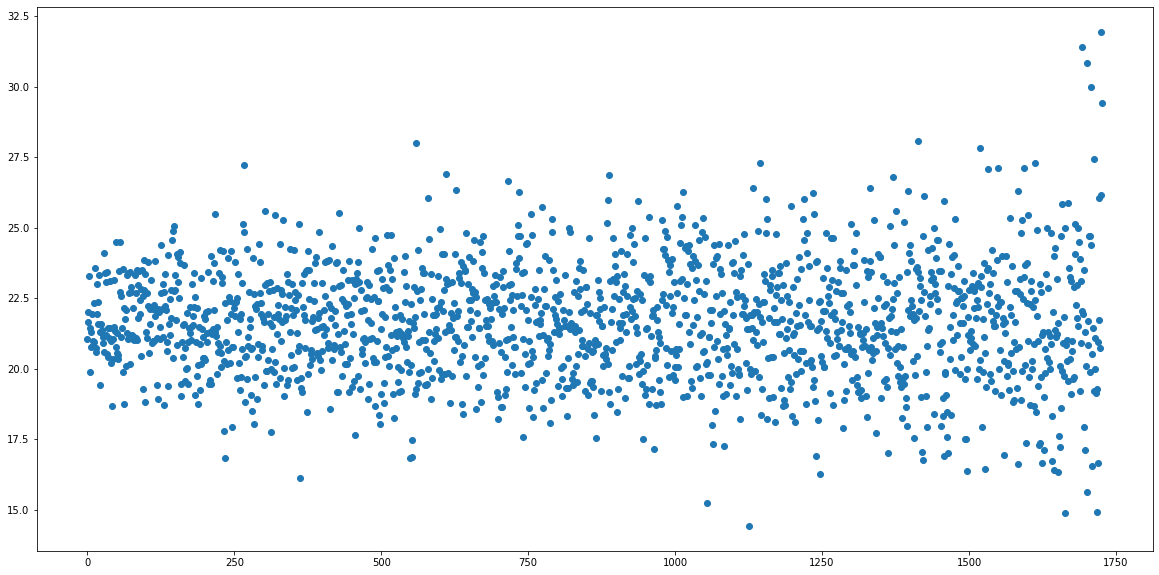

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.scatter(range(len(df3.number)), df3.number)
#plt.scatter(range(len(df3.number)), df3.number_techno, c='red')
plt.scatter(range(len(df3.number)), df3.perc)
plt.show()

In [15]:
df3.describe()

,number,number_techno,perc
count,1727.000000,1727.000000,1727.000000
mean,487.780544,105.635785,21.655388
std,143.494251,32.475607,2.013752
min,68.000000,20.000000,14.418605
25%,395.000000,83.500000,20.363822
50%,485.000000,106.000000,21.621622
75%,583.000000,127.000000,22.979781
max,1069.000000,225.000000,31.944444


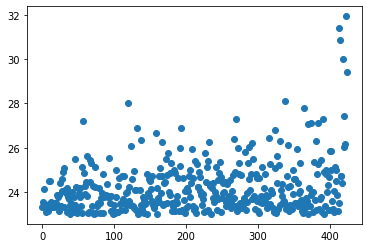

In [19]:
# Топ 25%

plt.scatter(range(len(df3[df3['perc'] > 23].perc)), df3[df3['perc'] > 23].perc)


In [22]:
len(df3[df3['perc'] > 23].perc)

424

Письмо будет направлено тем слушателям, у которых процент прослушиваний электронной музыки входит в первый квартиль ранжированной по доле выборки. В нашем случае это означает, что более 23% прослушанных песен пользователя составляет электронная музыка. Стоимость рекламы в целом будет составлять 424*10 = 4240 рублей.